In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


<b>Water Quality Index calculation:</b>
- GWQI = ∑ SIi
- SIi = Wi × Qi	
- Wi = wi/∑wi
- Qi = (Ci/Si) × 100

<b>Health Risk Assessment :</b>

- Average Daily Dose ADD = (C×IR×ED×EF)/BW×AT 
- Hazard Quotient HQ = ADD / RfD
- Hazard Index HI = HQAs + HQMn + HQFe
- Carcinogenic Risk CR = ADD × CSF × ADAF 

In [13]:
df=pd.read_excel('water quality.xlsx')
df.head(5)

,LAT_DEG,LONG_DEG,UNION,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
0,23.6147,89.8553,Faridpur Paurashava,24.4,471,127.0,27.6,0.20,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7
1,23.6075,89.8633,Faridpur Paurashava,27.4,580,142.0,9.3,0.40,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990
2,23.6031,89.8272,Ambikapur,36.6,529,116.0,33.9,0.20,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27
3,23.6064,89.8444,Faridpur Paurashava,18.9,568,116.0,16.5,0.10,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4
4,23.5689,89.8536,Aliabad,45.7,561,88.4,13.5,0.24,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4


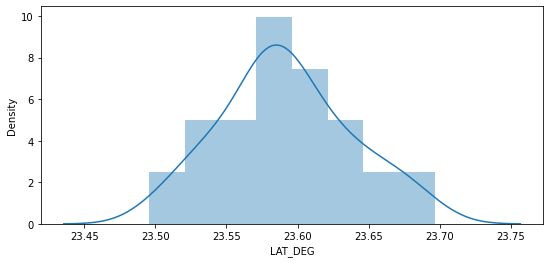

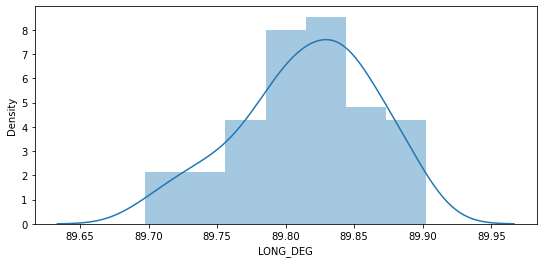

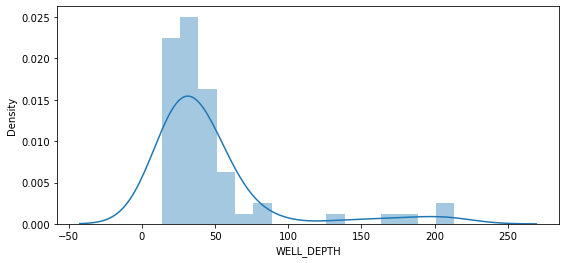

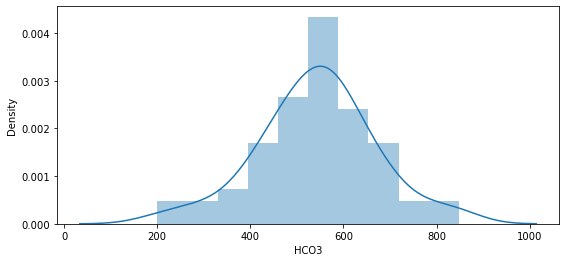

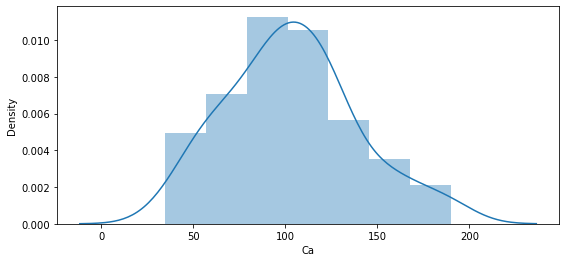

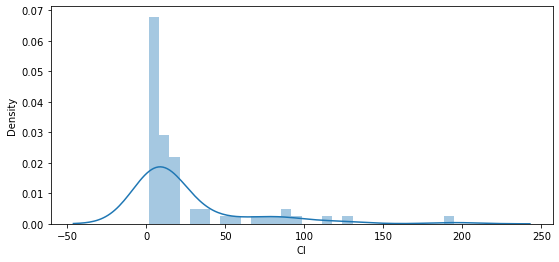

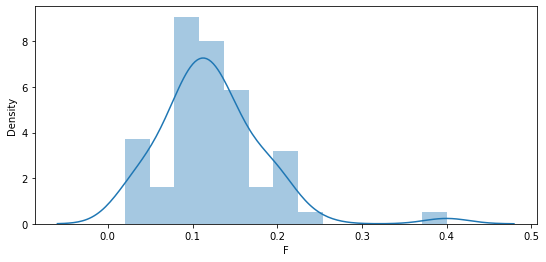

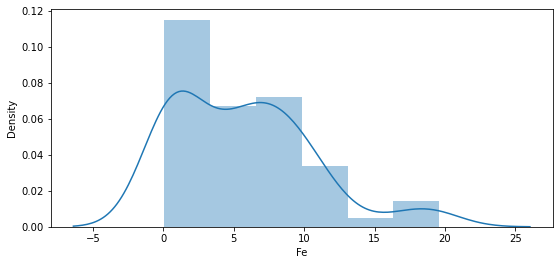

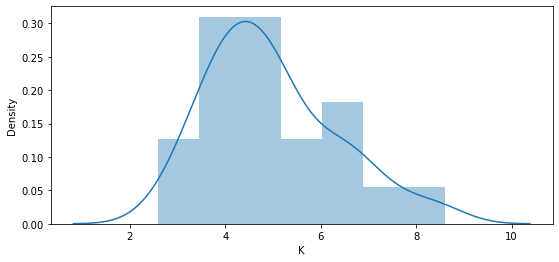

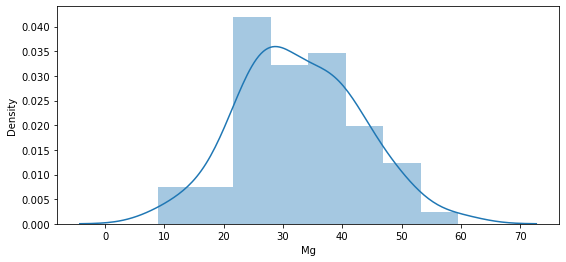

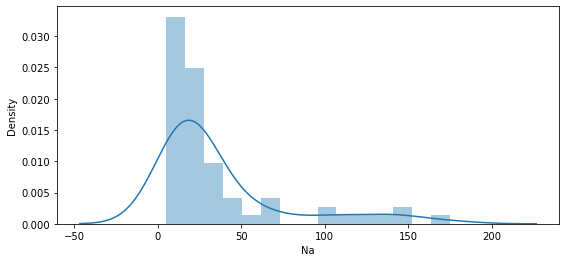

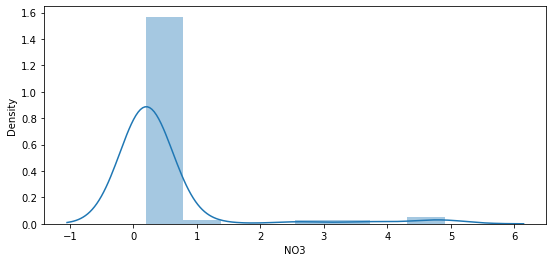

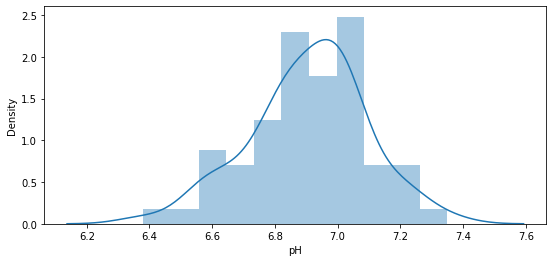

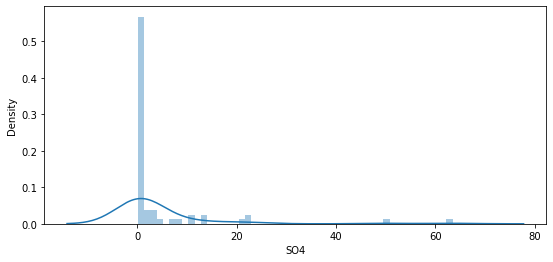

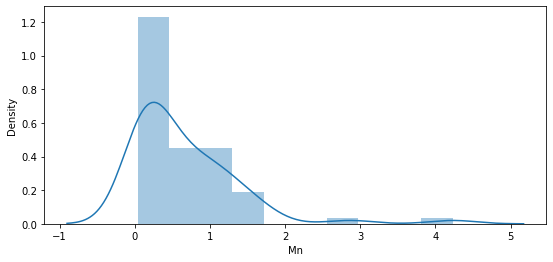

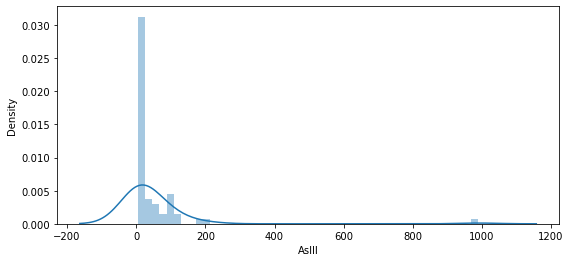

In [14]:
def plot_dist(pdf):
    for i, col in enumerate(pdf.select_dtypes([np.int,np.float]).columns):
        plt.figure(i, figsize=(9,4))
        sns.distplot(pdf[col])
        
        
plot_dist(df)

In [3]:
df.loc[df['UNION']=='Ambikapur']['NO3'].sum().round(2)

0.6

In [4]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
LAT_DEG,64.0,23.592,0.046,23.496,23.563,23.586,23.617,23.696
LONG_DEG,64.0,89.815,0.049,89.698,89.786,89.816,89.847,89.902
WELL_DEPTH,64.0,46.230,43.012,13.700,24.400,32.000,49.775,213.400
HCO3,64.0,541.812,127.346,200.000,476.250,554.500,612.500,848.000
Ca,64.0,103.725,35.518,34.800,78.275,101.000,123.250,190.000
Cl,64.0,24.675,36.601,1.800,4.650,10.450,17.925,195.000
F,64.0,0.122,0.061,0.020,0.088,0.120,0.150,0.400
Fe,64.0,5.642,4.924,0.052,0.866,5.550,8.500,19.600
K,64.0,4.966,1.365,2.600,3.975,4.750,5.725,8.600
Mg,64.0,32.680,10.097,8.920,25.900,32.100,39.700,59.500


In [4]:
def corr_plot(data,
              top_visible = False, right_visible = False, 
              bottom_visible = True, left_visible = False,
              ylabel = None, figsize = (15, 11), axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title('Correlations (Pearson)', size = 15, fontweight = 'bold', fontfamily = 'serif')
    
    mask = np.triu(np.ones_like(data.corr(), dtype = bool))
    sns.heatmap(round(data.corr(), 2), mask = mask, cmap = 'viridis', annot = True)
    plt.show()

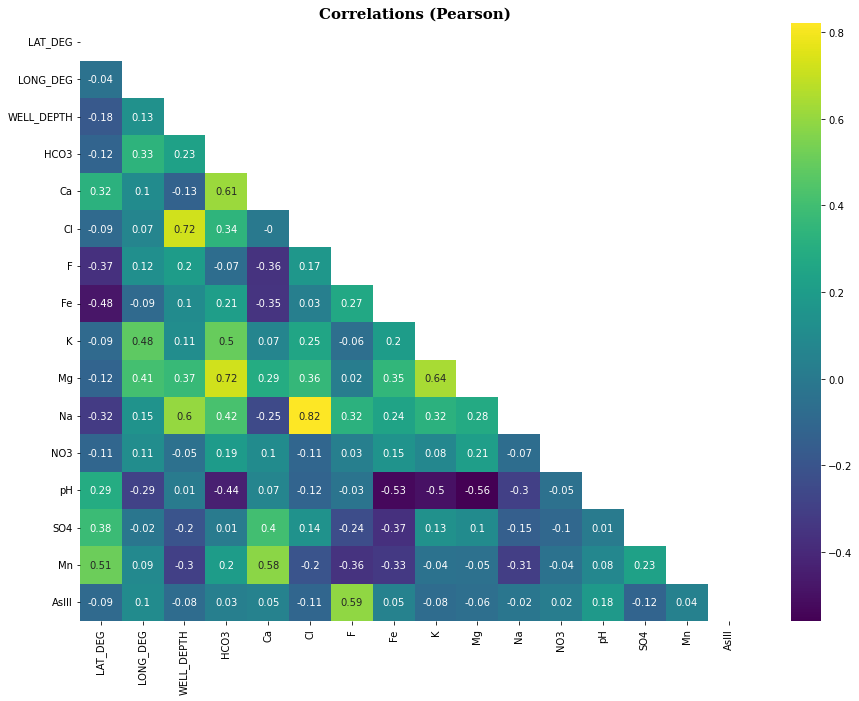

In [5]:
corr_plot(df)

<AxesSubplot:>

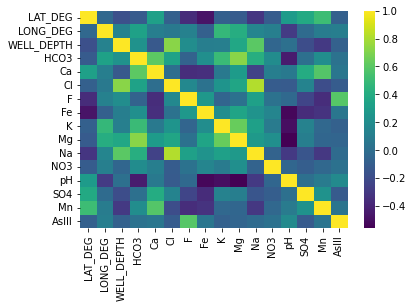

In [6]:
sns.heatmap(round(df.corr(), 2) ,cmap = 'viridis')

In [7]:
df.shape

(64, 17)

In [8]:
df.describe()

,LAT_DEG,LONG_DEG,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
count,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,23.591833,89.815016,46.229687,541.812500,103.72500,24.675000,0.121875,5.642125,4.965625,32.680000,36.435938,0.453125,6.905781,4.307812,0.656109,47.484375
std,0.046104,0.048968,43.011585,127.345658,35.51816,36.600963,0.060968,4.923974,1.364891,10.096984,39.570714,0.952019,0.186086,10.939259,0.721039,128.138813
min,23.495800,89.697500,13.700000,200.000000,34.80000,1.800000,0.020000,0.052000,2.600000,8.920000,5.100000,0.200000,6.380000,0.100000,0.041000,4.000000
25%,23.563475,89.785750,24.400000,476.250000,78.27500,4.650000,0.087500,0.866000,3.975000,25.900000,13.800000,0.200000,6.817500,0.100000,0.135250,4.000000
50%,23.586250,89.816250,32.000000,554.500000,101.00000,10.450000,0.120000,5.550000,4.750000,32.100000,21.100000,0.200000,6.935000,0.300000,0.389000,5.000000
75%,23.616850,89.846575,49.775000,612.500000,123.25000,17.925000,0.150000,8.500000,5.725000,39.700000,37.200000,0.200000,7.010000,2.100000,0.985750,46.750000
max,23.696400,89.902500,213.400000,848.000000,190.00000,195.000000,0.400000,19.600000,8.600000,59.500000,175.000000,4.900000,7.350000,63.500000,4.230000,990.000000


In [9]:
how_many=df[(df['AsIII']>50)]
len(how_many)

15

<AxesSubplot:xlabel='UNION'>

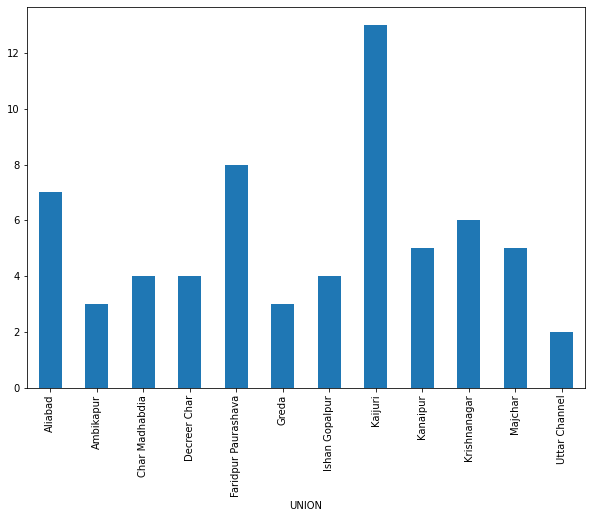

In [10]:
df.groupby(['UNION']).count()['HCO3'].plot(kind='bar',figsize=(10,7))

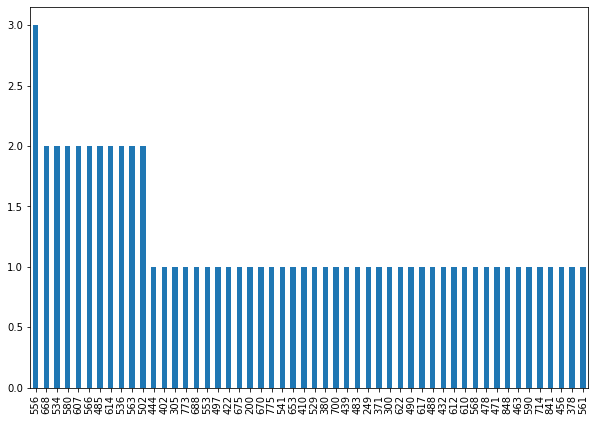

In [11]:
df['HCO3'].value_counts().plot(kind='bar',figsize=(10,7))

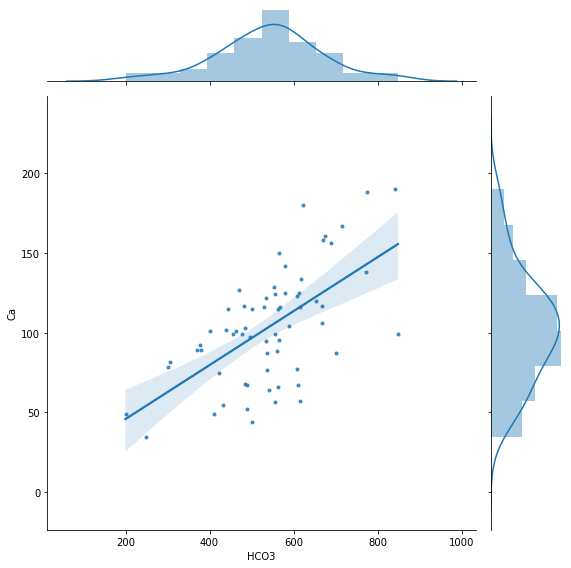

In [12]:
sns.jointplot(df['HCO3'], df['Ca'],
#               flights.loc[(flights['dep_delay'] > 1) &
#                           (flights['dep_delay'] < 500)],
              kind="reg", marker='.', height=8)

# WQI Equation

In [13]:
def exmp (c,w,s):
    relw=w/49
    wqi= relw*(c/s)*100
    return wqi

x=exmp (df.HCO3,1,500)
df['sub_index_hco3']=x

 ##similar process has to be repeated for other chemicals as well

In [14]:
df

,LAT_DEG,LONG_DEG,UNION,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII,sub_index_hco3
0,23.6147,89.8553,Faridpur Paurashava,24.4,471,127.0,27.6,0.20,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7,1.922449
1,23.6075,89.8633,Faridpur Paurashava,27.4,580,142.0,9.3,0.40,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990,2.367347
2,23.6031,89.8272,Ambikapur,36.6,529,116.0,33.9,0.20,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27,2.159184
3,23.6064,89.8444,Faridpur Paurashava,18.9,568,116.0,16.5,0.10,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4,2.318367
4,23.5689,89.8536,Aliabad,45.7,561,88.4,13.5,0.24,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4,2.289796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,23.5789,89.8411,Kaijuri,32.0,485,67.9,12.7,0.14,18.400,4.2,44.0,18.6,0.2,6.38,0.5,0.246,16,1.979592
60,23.6339,89.7581,Majchar,16.8,485,103.0,4.8,0.08,0.879,3.2,29.8,9.7,0.2,6.83,0.1,0.822,4,1.979592
61,23.5897,89.8128,Faridpur Paurashava,50.0,536,76.4,7.5,0.20,8.270,4.8,36.3,39.0,0.2,6.85,0.1,0.078,74,2.187755
62,23.6033,89.8408,Faridpur Paurashava,185.0,668,106.0,78.2,0.15,3.530,4.6,41.1,108.0,0.2,6.88,0.1,0.581,4,2.726531


In [15]:
# df.drop(['LAT_DEG','LONG_DEG',],axis=1,inplace=True)


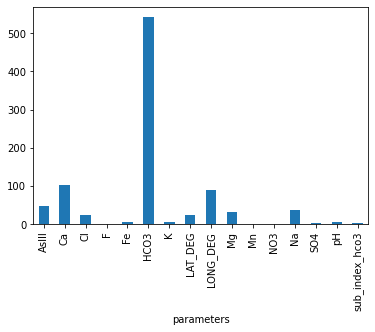

In [18]:
nw=df.melt(id_vars=['UNION','WELL_DEPTH'],value_name='conc.',var_name='parameters')
nw.groupby('parameters') ['conc.'].mean().plot(kind = 'bar')

In [11]:
def exmp (c,w,s):
    relw=w/49
    wqi= relw*(c/s)*100
    return wqi

x=exmp (df.Ca,4,75)
df['sub_index_Ca']=x

In [16]:
z=df.iloc[:,13:]
z.head(2)
# c=z.sum(axis=1)


,sub_index_hco3,sub_index_Ca
0,1.922449,13.823129
1,2.367347,15.455782


In [13]:
# z['final index']=c
# z.to_excel('WQI.xlsx')

# HEalth index

In [4]:
import pandas as pd

df=pd.read_excel('water quality.xlsx')
df.head()


,LAT_DEG,LONG_DEG,UNION,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
0,23.6147,89.8553,Faridpur Paurashava,24.4,471,127.0,27.6,0.20,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7
1,23.6075,89.8633,Faridpur Paurashava,27.4,580,142.0,9.3,0.40,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990
2,23.6031,89.8272,Ambikapur,36.6,529,116.0,33.9,0.20,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27
3,23.6064,89.8444,Faridpur Paurashava,18.9,568,116.0,16.5,0.10,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4
4,23.5689,89.8536,Aliabad,45.7,561,88.4,13.5,0.24,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4


In [7]:
df.describe()

,LAT_DEG,LONG_DEG,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
count,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,23.591833,89.815016,46.229688,541.812500,103.72500,24.675000,0.121875,5.642125,4.965625,32.680000,36.435937,0.453125,6.905781,4.307813,0.656109,47.484375
std,0.046104,0.048968,43.011585,127.345658,35.51816,36.600963,0.060968,4.923974,1.364891,10.096984,39.570714,0.952019,0.186086,10.939259,0.721039,128.138813
min,23.495800,89.697500,13.700000,200.000000,34.80000,1.800000,0.020000,0.052000,2.600000,8.920000,5.100000,0.200000,6.380000,0.100000,0.041000,4.000000
25%,23.563475,89.785750,24.400000,476.250000,78.27500,4.650000,0.087500,0.866000,3.975000,25.900000,13.800000,0.200000,6.817500,0.100000,0.135250,4.000000
50%,23.586250,89.816250,32.000000,554.500000,101.00000,10.450000,0.120000,5.550000,4.750000,32.100000,21.100000,0.200000,6.935000,0.300000,0.389000,5.000000
75%,23.616850,89.846575,49.775000,612.500000,123.25000,17.925000,0.150000,8.500000,5.725000,39.700000,37.200000,0.200000,7.010000,2.100000,0.985750,46.750000
max,23.696400,89.902500,213.400000,848.000000,190.00000,195.000000,0.400000,19.600000,8.600000,59.500000,175.000000,4.900000,7.350000,63.500000,4.230000,990.000000


In [9]:
df.groupby(['UNION']).count()['HCO3']


UNION
Aliabad                 7
Ambikapur               3
Char Madhabdia          4
Decreer Char            4
Faridpur Paurashava     8
Greda                   3
Ishan Gopalpur          4
Kaijuri                13
Kanaipur                5
Krishnanagar            6
Majchar                 5
Uttar Channel           2
Name: HCO3, dtype: int64

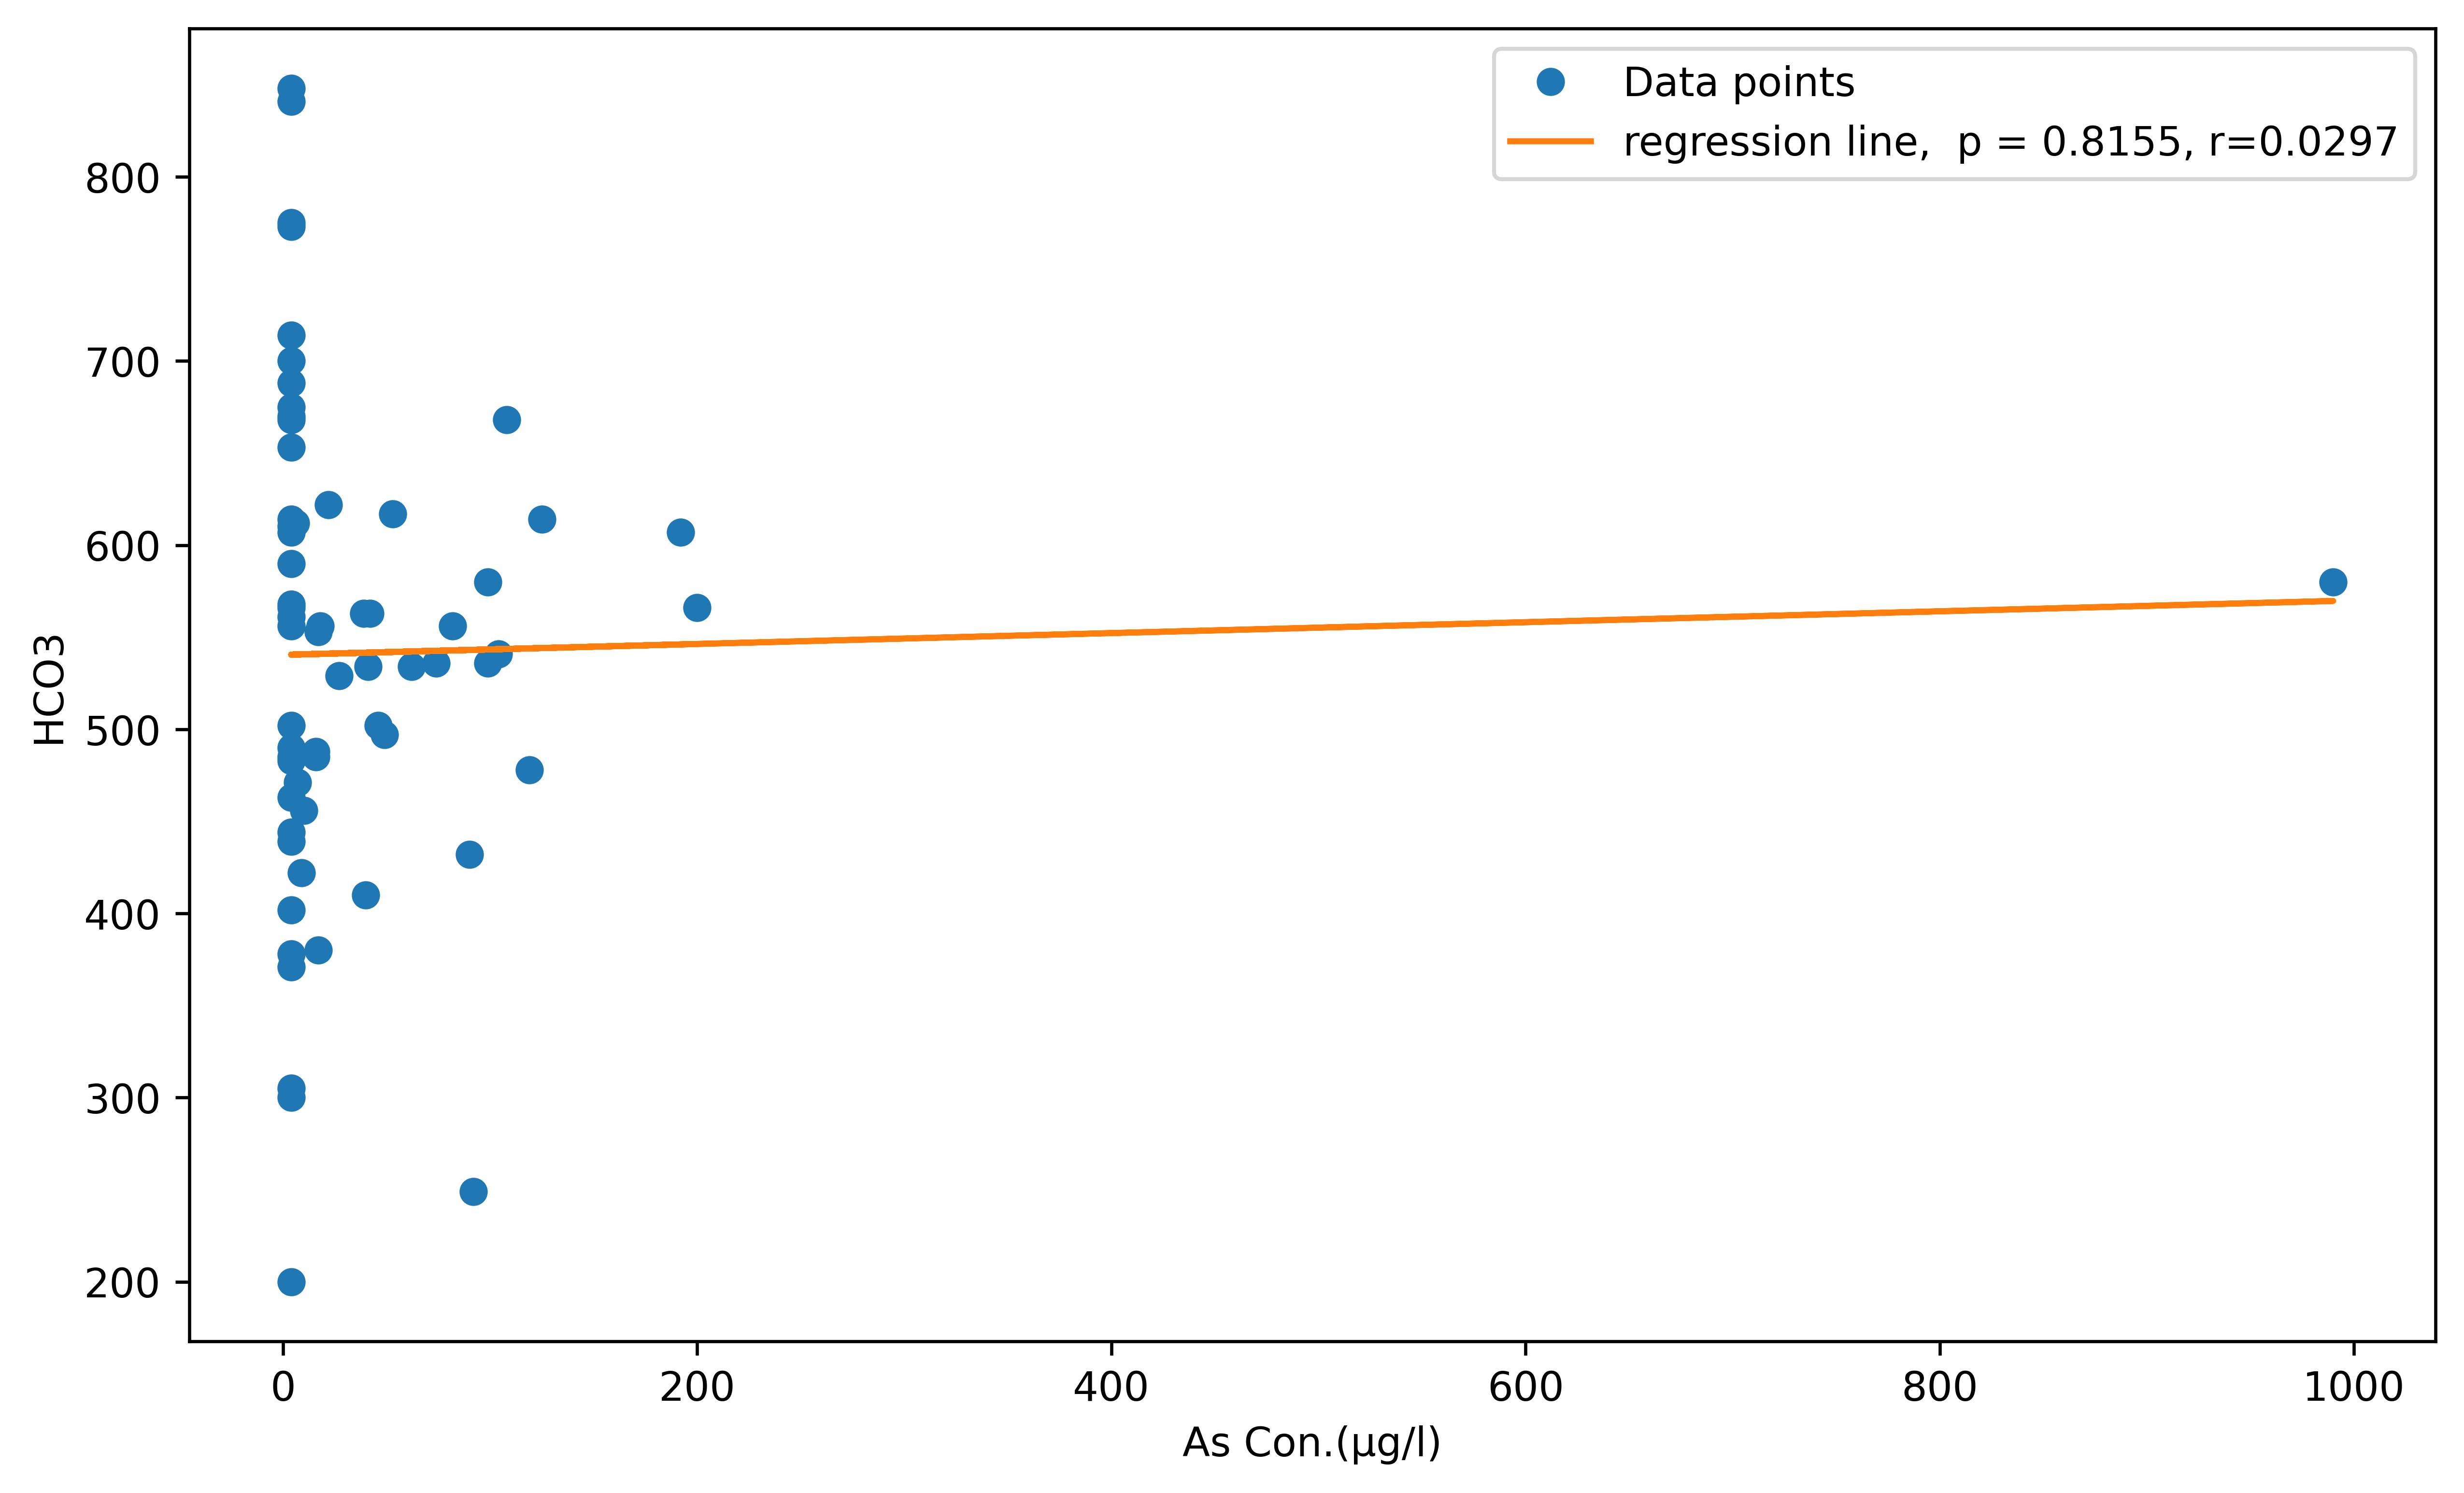

In [10]:
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
x=df["AsIII"]

y=df["HCO3"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'regression line,  p = {p:.4f}, r={r:.4f}'

fig, ax = plt.subplots(figsize = (10,6),dpi=600)
ax.plot(x, y,  linewidth=0,marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('As Con.(µg/l)')
ax.set_ylabel('HCO3')
ax.legend(facecolor='white')

plt.show()

In [3]:
m=df.drop(['LAT_DEG','LONG_DEG','WELL_DEPTH'],axis=1)

In [4]:
nw=m.melt(id_vars=['UNION'],value_name='conc.',var_name='parameters')
nw.head(2)


,UNION,parameters,conc.
0,Faridpur Paurashava,HCO3,471.0
1,Faridpur Paurashava,HCO3,580.0


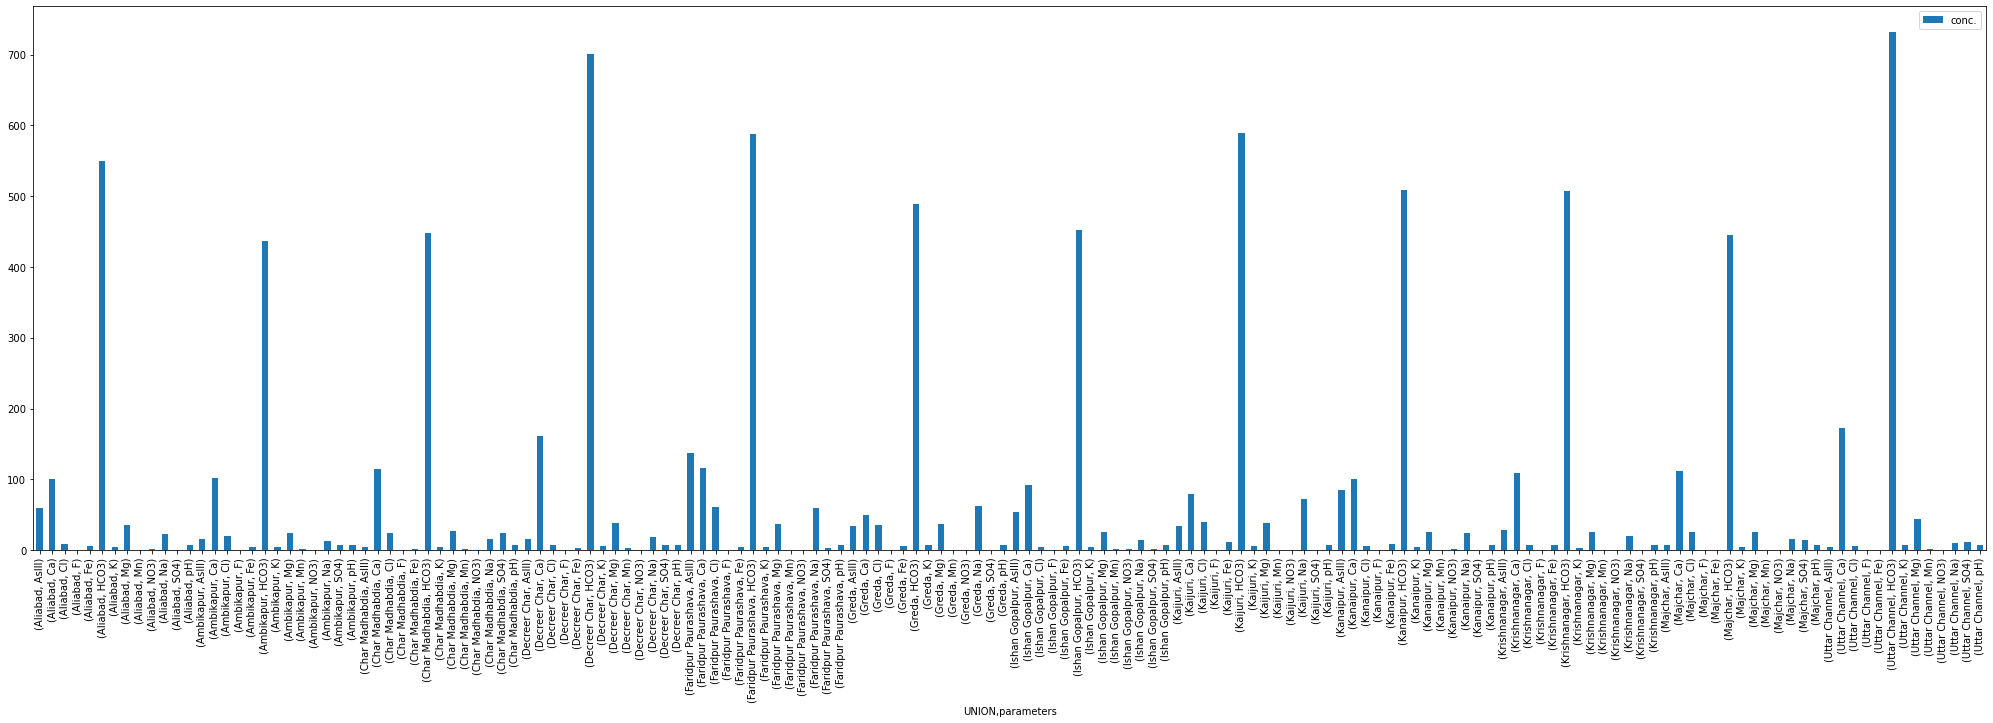

In [11]:
nw.groupby(['UNION','parameters']).mean().plot(kind= 'bar', figsize = (35,10))

Text(3.67499999999999, 0.5, 'Concentration(µg/l)')

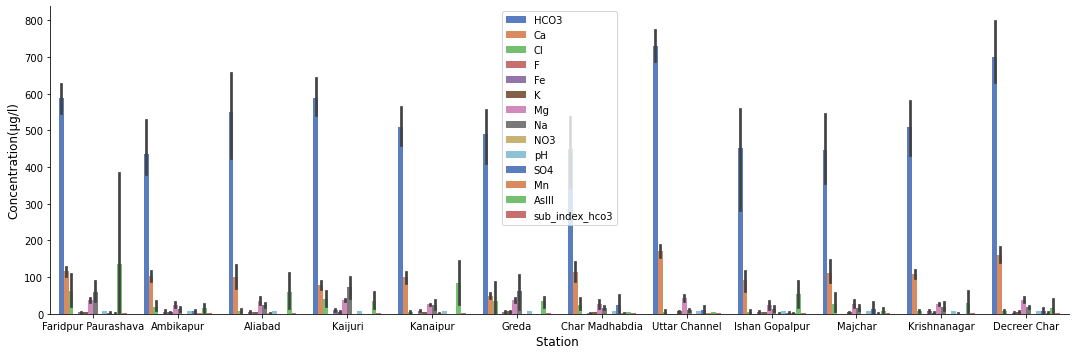

In [35]:
import seaborn as sns
sns.catplot(x="UNION",y='conc.', kind="bar",hue = 'parameters',palette='muted', aspect=3,data=nw,height =5,legend_out = False)
plt.legend(loc='upper center')

plt.xlabel('Station ',fontsize ='large')
plt.ylabel('Concentration(µg/l)',fontsize = 'large')

Text(0, 0.5, 'Concentration(µg/l)')

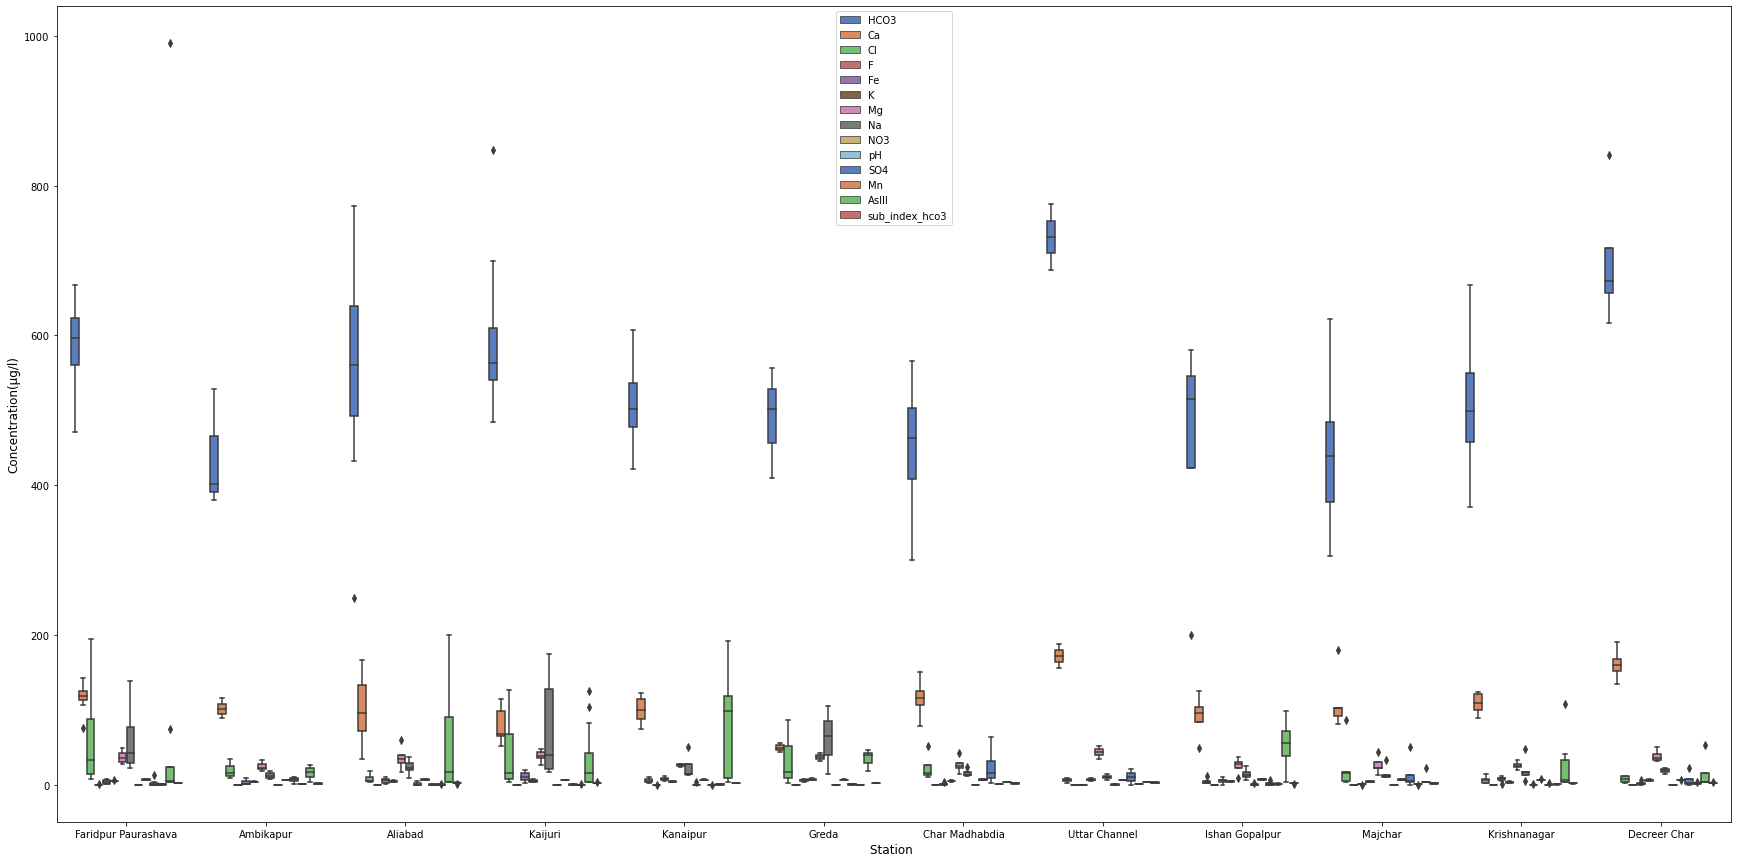

In [32]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (30,15))
sns.boxplot(x="UNION",y='conc.', hue = 'parameters',palette='muted',data=nw)
ax.legend(loc='upper center')

ax.set_xlabel('Station ',fontsize ='large')
ax.set_ylabel('Concentration(µg/l)',fontsize = 'large')

In [22]:
nw.groupby(['UNION','parameters'])['conc.'].mean().head(25)

UNION      parameters
Aliabad    AsIII          58.714286
           Ca            101.071429
           Cl              8.128571
           F               0.141429
           Fe              5.651429
           HCO3          549.714286
           K               5.014286
           Mg             35.357143
           Mn              0.367571
           NO3             1.514286
           Na             23.328571
           SO4             0.257143
           pH              6.957143
Ambikapur  AsIII          16.000000
           Ca            102.066667
           Cl             19.533333
           F               0.116667
           Fe              3.636667
           HCO3          437.000000
           K               3.800000
           Mg             24.533333
           Mn              1.010667
           NO3             0.200000
           Na             12.533333
           SO4             6.533333
Name: conc., dtype: float64

In [72]:
df

,UNION,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII,Fe_HQ_for_0-5,Fe_HQ_for_6-15,Mn_HQ_for_0-5,Mn_HQ_for_6-15,HI_grp1,HI_grp2,CR_for_>15
0,Faridpur Paurashava,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7,0.044039,0.046442,0.724138,0.763636,0.768177,0.810078,0.000643
1,Faridpur Paurashava,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990,0.417734,0.440519,0.556650,0.587013,0.974384,1.027532,0.090918
2,Ambikapur,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27,0.945813,0.997403,0.556650,0.587013,1.502463,1.584416,0.002480
3,Faridpur Paurashava,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4,0.093005,0.098078,0.492118,0.518961,0.585123,0.617039,0.000367
4,Aliabad,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4,0.756650,0.797922,0.039409,0.041558,0.796059,0.839481,0.000367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Kaijuri,18.400,4.2,44.0,18.6,0.2,6.38,0.5,0.246,16,1.812808,1.911688,0.121182,0.127792,1.933990,2.039481,0.001469
60,Majchar,0.879,3.2,29.8,9.7,0.2,6.83,0.1,0.822,4,0.086601,0.091325,0.404926,0.427013,0.491527,0.518338,0.000367
61,Faridpur Paurashava,8.270,4.8,36.3,39.0,0.2,6.85,0.1,0.078,74,0.814778,0.859221,0.038424,0.040519,0.853202,0.899740,0.006796
62,Faridpur Paurashava,3.530,4.6,41.1,108.0,0.2,6.88,0.1,0.581,4,0.347783,0.366753,0.286207,0.301818,0.633990,0.668571,0.000367


In [6]:
df.Ca

0     127.0
1     142.0
2     116.0
3     116.0
4      88.4
      ...  
59     67.9
60    103.0
61     76.4
62    106.0
63     54.6
Name: Ca, Length: 64, dtype: float64

In [ ]:
df['new']

In [32]:
df.drop(['LAT_DEG','LONG_DEG','WELL_DEPTH','HCO3','Ca','Cl','F'],axis=1,inplace=True)


In [44]:
# df.head()

# non carcinogenic

In [36]:
def for_non(C,IR):
    
    ED=5
    EF=365
    BW=14.5
    AT=ED*365
    AD=C*IR*ED*EF/(BW*AT)
    return AD

ADD=for_non(df.Fe,1)

# print('ADD:',ADD)
RF=.7
HQ = ADD/RF
print('HQ:',HQ)
df['Fe_HQ_for_0-5']=HQ



HQ: 0     0.044039
1     0.417734
2     0.945813
3     0.093005
4     0.756650
        ...   
59    1.812808
60    0.086601
61    0.814778
62    0.347783
63    0.617734
Name: Fe, Length: 64, dtype: float64


In [37]:
df

,UNION,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII,Fe_HQ_for_0-5
0,Faridpur Paurashava,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7,0.044039
1,Faridpur Paurashava,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990,0.417734
2,Ambikapur,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27,0.945813
3,Faridpur Paurashava,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4,0.093005
4,Aliabad,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4,0.756650
...,...,...,...,...,...,...,...,...,...,...,...
59,Kaijuri,18.400,4.2,44.0,18.6,0.2,6.38,0.5,0.246,16,1.812808
60,Majchar,0.879,3.2,29.8,9.7,0.2,6.83,0.1,0.822,4,0.086601
61,Faridpur Paurashava,8.270,4.8,36.3,39.0,0.2,6.85,0.1,0.078,74,0.814778
62,Faridpur Paurashava,3.530,4.6,41.1,108.0,0.2,6.88,0.1,0.581,4,0.347783


In [38]:
def for_non(C,IR):
    ED=10
    EF=365
    BW=27.5
    AT=ED*365
    ADD=C*IR*ED*EF/(BW*AT)
    return ADD
ADD=(for_non(df.Fe,2))
# print('ADD:',ADD)
RF=.7
HQ = ADD/RF
# print('HQ:',HQ)
df['Fe_HQ_for_6-15']=HQ

In [39]:
def for_non(C,IR):
    
    ED=5
    EF=365
    BW=14.5
    AT=ED*365
    AD=C*IR*ED*EF/(BW*AT)
    return AD
ADD=for_non(df.Mn,1)
# print('ADD:',ADD)
RF=.14
HQ = ADD/RF
# print('HQ:',HQ)
df['Mn_HQ_for_0-5']=HQ

In [40]:
def for_non(C,IR):
    ED=10
    EF=365
    BW=27.5
    AT=ED*365
    ADD=C*IR*ED*EF/(BW*AT)
    return ADD
ADD=(for_non(df.Mn,2))
# print('ADD:',ADD)
RF=.14
HQ = ADD/RF
# print('HQ:',HQ)
df['Mn_HQ_for_6-15']=HQ

# df['HII1']=df.iloc[:,[13,15]].sum(axis=1)

In [43]:
df





,UNION,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII,Fe_HQ_for_0-5,Fe_HQ_for_6-15,Mn_HQ_for_0-5,Mn_HQ_for_6-15
0,Faridpur Paurashava,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7,0.044039,0.046442,0.724138,0.763636
1,Faridpur Paurashava,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990,0.417734,0.440519,0.556650,0.587013
2,Ambikapur,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27,0.945813,0.997403,0.556650,0.587013
3,Faridpur Paurashava,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4,0.093005,0.098078,0.492118,0.518961
4,Aliabad,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4,0.756650,0.797922,0.039409,0.041558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Kaijuri,18.400,4.2,44.0,18.6,0.2,6.38,0.5,0.246,16,1.812808,1.911688,0.121182,0.127792
60,Majchar,0.879,3.2,29.8,9.7,0.2,6.83,0.1,0.822,4,0.086601,0.091325,0.404926,0.427013
61,Faridpur Paurashava,8.270,4.8,36.3,39.0,0.2,6.85,0.1,0.078,74,0.814778,0.859221,0.038424,0.040519
62,Faridpur Paurashava,3.530,4.6,41.1,108.0,0.2,6.88,0.1,0.581,4,0.347783,0.366753,0.286207,0.301818


In [48]:
df['HI_grp1']= df.iloc[:,[10,12]].sum(axis=1)
df['HI_grp2']= df.iloc[:,[11,13]].sum(axis=1)
df


,UNION,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII,Fe_HQ_for_0-5,Fe_HQ_for_6-15,Mn_HQ_for_0-5,Mn_HQ_for_6-15,HI_grp1,HI_grp2
0,Faridpur Paurashava,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7,0.044039,0.046442,0.724138,0.763636,0.768177,0.810078
1,Faridpur Paurashava,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990,0.417734,0.440519,0.556650,0.587013,0.974384,1.027532
2,Ambikapur,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27,0.945813,0.997403,0.556650,0.587013,1.502463,1.584416
3,Faridpur Paurashava,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4,0.093005,0.098078,0.492118,0.518961,0.585123,0.617039
4,Aliabad,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4,0.756650,0.797922,0.039409,0.041558,0.796059,0.839481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Kaijuri,18.400,4.2,44.0,18.6,0.2,6.38,0.5,0.246,16,1.812808,1.911688,0.121182,0.127792,1.933990,2.039481
60,Majchar,0.879,3.2,29.8,9.7,0.2,6.83,0.1,0.822,4,0.086601,0.091325,0.404926,0.427013,0.491527,0.518338
61,Faridpur Paurashava,8.270,4.8,36.3,39.0,0.2,6.85,0.1,0.078,74,0.814778,0.859221,0.038424,0.040519,0.853202,0.899740
62,Faridpur Paurashava,3.530,4.6,41.1,108.0,0.2,6.88,0.1,0.581,4,0.347783,0.366753,0.286207,0.301818,0.633990,0.668571


In [22]:
df['HI_gp1'] = df.loc[:,['Fe_HQ_for_0-5','Mn_HQ_for_0-5']].sum(axis=1)
df['HI_gp2'] = df.loc[:,['Fe_HQ_for_6-15','Mn_HQ_for_6-15']].sum(axis=1)


In [60]:
df.shape




(64, 16)

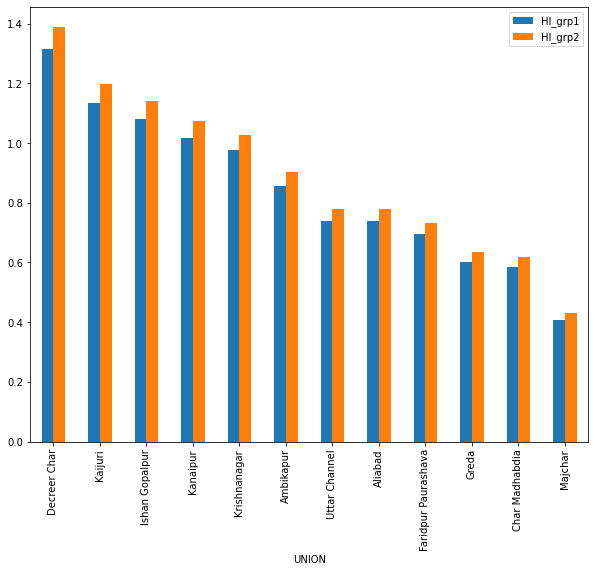

In [68]:
HI= df.iloc[:,[0,14,15]]
HI.groupby('UNION').mean().sort_values('HI_grp1',ascending=False).plot(kind='bar',figsize=(10,8))
# HI.to_excel('hzrd index.xlsx')

# Carcinogenic

In [69]:
def for_non(C,IR):
    ED=50
    EF=365
    BW=70
    AT=70*365
    ADD=C*IR*ED*EF/(BW*AT)
    return ADD
ADD=(for_non(df.AsIII,2))
# print('ADD:',ADD)
CSF=1.5/1000
cr = CSF*ADD*3
# print(cr)
df['CR_for_>15']=cr
df


,UNION,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII,Fe_HQ_for_0-5,Fe_HQ_for_6-15,Mn_HQ_for_0-5,Mn_HQ_for_6-15,HI_grp1,HI_grp2,CR_for_>15
0,Faridpur Paurashava,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7,0.044039,0.046442,0.724138,0.763636,0.768177,0.810078,0.000643
1,Faridpur Paurashava,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990,0.417734,0.440519,0.556650,0.587013,0.974384,1.027532,0.090918
2,Ambikapur,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27,0.945813,0.997403,0.556650,0.587013,1.502463,1.584416,0.002480
3,Faridpur Paurashava,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4,0.093005,0.098078,0.492118,0.518961,0.585123,0.617039,0.000367
4,Aliabad,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4,0.756650,0.797922,0.039409,0.041558,0.796059,0.839481,0.000367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Kaijuri,18.400,4.2,44.0,18.6,0.2,6.38,0.5,0.246,16,1.812808,1.911688,0.121182,0.127792,1.933990,2.039481,0.001469
60,Majchar,0.879,3.2,29.8,9.7,0.2,6.83,0.1,0.822,4,0.086601,0.091325,0.404926,0.427013,0.491527,0.518338,0.000367
61,Faridpur Paurashava,8.270,4.8,36.3,39.0,0.2,6.85,0.1,0.078,74,0.814778,0.859221,0.038424,0.040519,0.853202,0.899740,0.006796
62,Faridpur Paurashava,3.530,4.6,41.1,108.0,0.2,6.88,0.1,0.581,4,0.347783,0.366753,0.286207,0.301818,0.633990,0.668571,0.000367
